In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

          sn  subject_id  hadm_id  icustay_id  bin_number  mean_hr  \
24175  24175       99985   176670      279638          26     93.0   
24176  24176       99985   176670      279638          27     87.0   
24177  24177       99985   176670      279638          28     87.0   
24178  24178       99985   176670      279638          29     81.0   
24179  24179       99985   176670      279638          30     77.0   

       diastolicbp_mean  resprate_mean  spo2_mean  systolicbp_mean  temp_mean  \
24175              68.0           26.0       98.0            141.0      37.11   
24176              61.0           23.0       99.0            122.0        NaN   
24177              61.0           24.0       98.0            110.0        NaN   
24178              61.0           20.0       99.0            110.0        NaN   
24179              61.0           22.0       96.0            116.0      38.00   

       meanbp_mean  class   id  
24175         92.0      0  806  
24176         79.0      0 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEE4E9B5C8>,
      dtype=object)

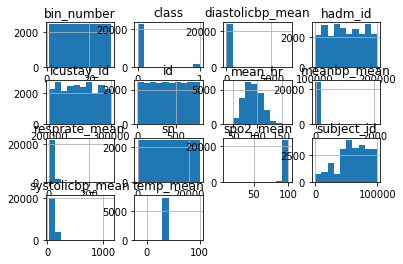

In [2]:
data = pd.read_csv('heartattack.csv')

data=data.drop(['event_time'], axis=1)

data.hist()


In [7]:
from sklearn.impute import SimpleImputer

In [11]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
print(data.head())

     0      1         2         3    4           5          6          7  \
0  0.0  124.0  138376.0  256064.0  1.0   72.000000  47.000000  12.000000   
1  1.0  124.0  138376.0  256064.0  2.0   73.000000  35.000000  18.000000   
2  2.0  124.0  138376.0  256064.0  3.0   90.372843  59.477503  20.541454   
3  3.0  124.0  138376.0  256064.0  4.0  102.000000  59.477503   9.000000   
4  4.0  124.0  138376.0  256064.0  5.0  109.000000  88.000000   8.000000   

            8           9         10          11   12   13  
0   96.000000  167.000000  36.976518   89.000000  0.0  1.0  
1  100.000000  106.000000  36.976518   59.000000  0.0  1.0  
2   97.186242  116.448514  36.976518   78.914126  0.0  1.0  
3   91.000000  116.448514  36.976518   78.914126  0.0  1.0  
4  100.000000  209.000000  36.976518  142.000000  0.0  1.0  


In [15]:
data[12].value_counts()

0.0    22590
1.0     1590
Name: 12, dtype: int64

In [17]:
non_attack=data[data[12]==0]
attack=data[data[12]==1]
non_attack.shape, attack.shape

((22590, 14), (1590, 14))

In [18]:
non_attack=non_attack.sample(attack.shape[0])
non_attack.shape

(1590, 14)

In [22]:
data=attack.append(non_attack,ignore_index=True)
data.shape

(3180, 14)

In [25]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,600.0,7533.0,166898.0,208809.0,1.0,111.0,45.0,23.0,94.0,91.0,37.670000,60.0,1.0,21.0
1,601.0,7533.0,166898.0,208809.0,2.0,114.0,44.0,25.0,96.0,76.0,36.976518,55.0,1.0,21.0
2,602.0,7533.0,166898.0,208809.0,3.0,112.0,59.0,25.0,98.0,114.0,37.170000,78.0,1.0,21.0
3,603.0,7533.0,166898.0,208809.0,4.0,87.0,48.0,0.0,96.0,89.0,36.976518,63.0,1.0,21.0
4,604.0,7533.0,166898.0,208809.0,5.0,97.0,47.0,28.0,98.0,88.0,36.976518,62.0,1.0,21.0


In [29]:
X=data.drop(labels=[12],axis=1)
y=data[12]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)#prepared for training and testing data set

In [31]:
X_train.shape,X_test.shape

((2544, 13), (636, 13))

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
y_train=pd.DataFrame(y_train).to_numpy()
y_test=pd.DataFrame(y_test).to_numpy()

In [34]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [35]:
X_train.shape,X_test.shape

((2544, 13, 1), (636, 13, 1))

In [36]:
input_shape=X_train[0].shape
input_shape

(13, 1)

In [39]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras import Sequential

In [40]:
epochs=100
model=Sequential()

model.add(Conv1D(32,2, activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [41]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 704)               0

In [43]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history=model.fit(X_train,y_train,epochs=epochs, validation_data=(X_test,y_test),verbose=1)

Train on 2544 samples, validate on 636 samples
Epoch 1/100
2544/2544 [==============================] - 5s 2ms/sample - loss: 1.2011 - accuracy: 0.5142 - val_loss: 0.6847 - val_accuracy: 0.5456
Epoch 2/100
2544/2544 [==============================] - 1s 284us/sample - loss: 1.0207 - accuracy: 0.5550 - val_loss: 0.6678 - val_accuracy: 0.6053
Epoch 3/100
2544/2544 [==============================] - 1s 246us/sample - loss: 0.9277 - accuracy: 0.5778 - val_loss: 0.6405 - val_accuracy: 0.6667
Epoch 4/100
2544/2544 [==============================] - 1s 249us/sample - loss: 0.9062 - accuracy: 0.5865 - val_loss: 0.6135 - val_accuracy: 0.6682
Epoch 5/100
2544/2544 [==============================] - 1s 246us/sample - loss: 0.8790 - accuracy: 0.6053 - val_loss: 0.5903 - val_accuracy: 0.6981
Epoch 6/100
2544/2544 [==============================] - 1s 249us/sample - loss: 0.8315 - accuracy: 0.6069 - val_loss: 0.5755 - val_accuracy: 0.7075
Epoch 7/100
2544/2544 [==============================] - 1s 2

2544/2544 [==============================] - 1s 263us/sample - loss: 0.5484 - accuracy: 0.7347 - val_loss: 0.5065 - val_accuracy: 0.7736
Epoch 56/100
2544/2544 [==============================] - 1s 272us/sample - loss: 0.5393 - accuracy: 0.7355 - val_loss: 0.5046 - val_accuracy: 0.7720
Epoch 57/100
2544/2544 [==============================] - 1s 273us/sample - loss: 0.5345 - accuracy: 0.7288 - val_loss: 0.5009 - val_accuracy: 0.7736
Epoch 58/100
2544/2544 [==============================] - 1s 266us/sample - loss: 0.5542 - accuracy: 0.7248 - val_loss: 0.4992 - val_accuracy: 0.7720
Epoch 59/100
2544/2544 [==============================] - 1s 260us/sample - loss: 0.5493 - accuracy: 0.7264 - val_loss: 0.4997 - val_accuracy: 0.7720
Epoch 60/100
2544/2544 [==============================] - 1s 245us/sample - loss: 0.5312 - accuracy: 0.7355 - val_loss: 0.4979 - val_accuracy: 0.7736
Epoch 61/100
2544/2544 [==============================] - 1s 270us/sample - loss: 0.5410 - accuracy: 0.7327 - val

In [45]:
y_pred = model.predict(X_test)

In [46]:
scaler.scale_

array([7.29522910e+03, 2.53106081e+04, 2.78326591e+04, 2.77783149e+04,
       8.64843086e+00, 1.88122512e+01, 1.28589810e+01, 7.51838341e+00,
       3.90004436e+00, 2.04063052e+01, 1.17549858e+00, 4.26315889e+01,
       2.43174802e+02])

In [47]:
scale = 1/7.29522910e+03
scale

0.00013707588703417141

In [48]:
y_pred = y_pred*scale
y_test = y_test*scale


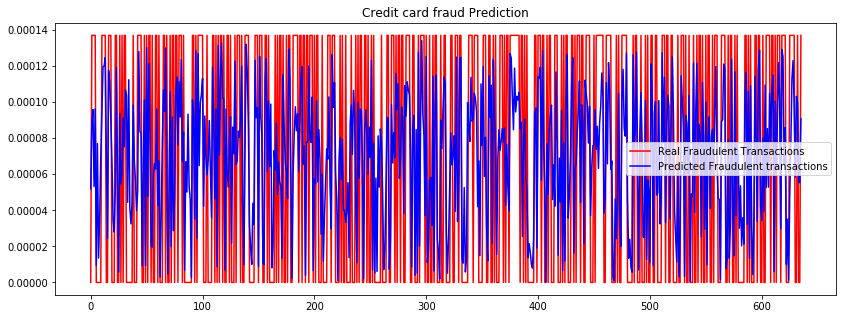

In [49]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Fraudulent Transactions')
plt.plot(y_pred, color = 'blue', label = 'Predicted Fraudulent transactions')
plt.title('Credit card fraud Prediction')
#plt.xlabel()
#plt.ylabel()
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test.round(),y_pred.round()))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       636

    accuracy                           1.00       636
   macro avg       1.00      1.00      1.00       636
weighted avg       1.00      1.00      1.00       636

